___
<h1> Machine Learning </h1>
<h2> M. Sc. in Electrical and Computer Engineering </h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[MEEC](https://ise.ualg.pt/en/curso/1477) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)
___

# $k$-Nearest Neighbors (kNN): Regression

In [15]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


from sklearn.neighbors import KNeighborsRegressor
import numpy as np

import pandas as pd

np.random.seed(1)

## k-Neighbors Regression

There is also a regression variant of the k-nearest neighbors algorithm. Again, let’s start by using a single nearest neighbor, this time using the wave dataset. 

The prediction using a single neighbor (1-NN) is just the target value of the nearest neighbor. When using multiple nearest neighbors for regression, the prediction is the average (or mean) of the relevant neighbors

In [16]:
# set a 'wave'
n_samples = 50
a = -10
b = 10

def make_wave(n_samples=50, a=-10, b=10):
    np.random.seed(2)
    timeline = np.linspace(a, b, n_samples).reshape(1, -1)[0]
    return timeline, (10 * np.cos(timeline) + 5 * np.random.rand(len(timeline)))

timeline, wave = make_wave(n_samples, a, b)
timeline, wave

(array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
         -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
         -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
         -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
         -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
         -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
         -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
          1.42857143,   1.83673469,   2.24489796,   2.65306122,
          3.06122449,   3.46938776,   3.87755102,   4.28571429,
          4.69387755,   5.10204082,   5.51020408,   5.91836735,
          6.32653061,   6.73469388,   7.14285714,   7.55102041,
          7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
          9.59183673,  10.        ]),
 array([-6.21074078, -9.73114991, -6.96243603, -5.78865532, -2.80927627,
         0.60159317,  4.00672191,  9.62321613, 10.49617239, 11.32474377,
        12.44755641,  9.80403193,  4.47156345,  

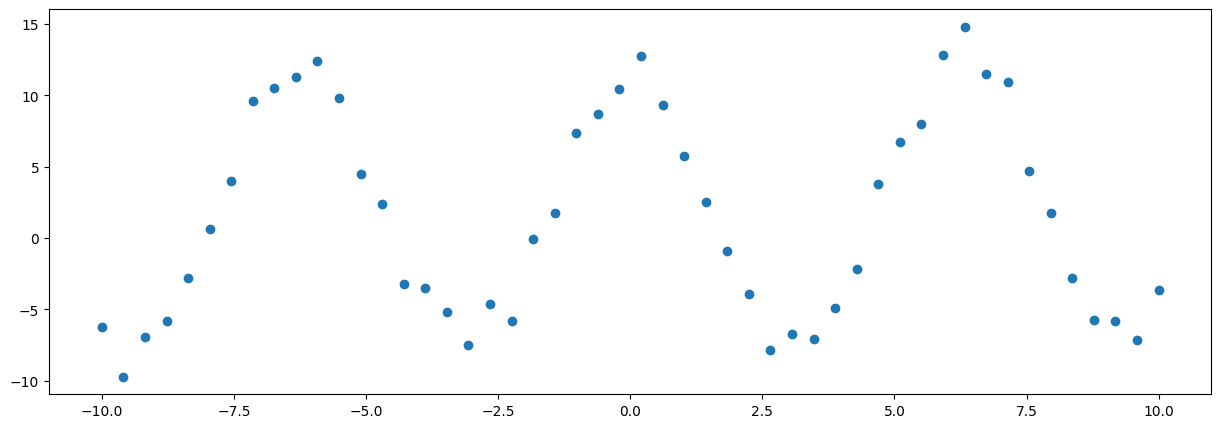

In [17]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(timeline, wave, linestyle='None', marker='o')
plt.show()

As usual, split the test

In [18]:
x_train, x_test, y_train, y_test = train_test_split(timeline, wave, test_size=.1)

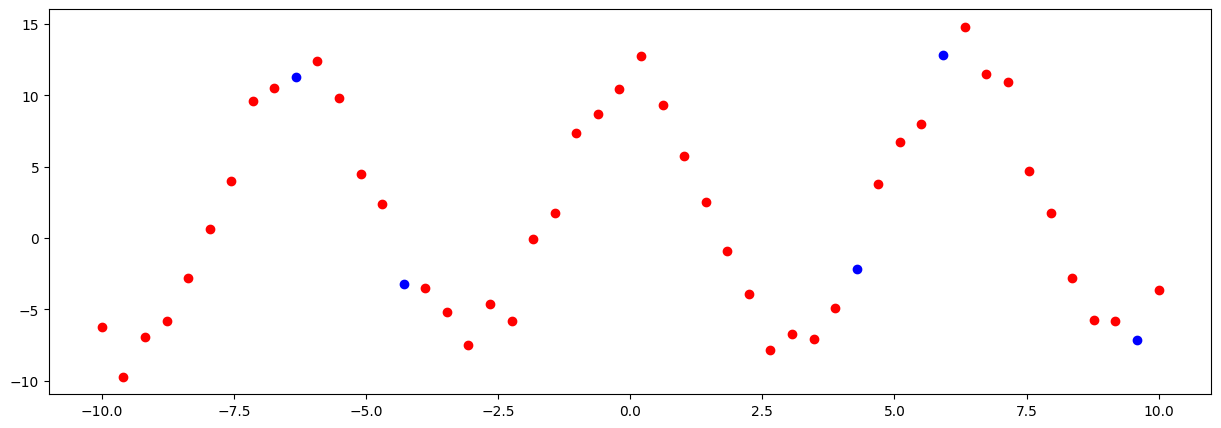

In [19]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(x_train, y_train, linestyle="none", marker='o', c="red")
ax.plot(x_test, y_test, linestyle="none", marker='o', c="blue")
plt.show()

and then train the model

In [20]:
knr = KNeighborsRegressor(
        n_neighbors=3, 
        weights='distance').fit(x_train.reshape(-1, 1), y_train)

And now the predictions

In [21]:
results = pd.DataFrame({"x_test": x_test, "y_test": y_test, "y_pred": knr.predict(x_test.reshape(-1, 1))})
results

,x_test,y_test,y_pred
0,5.918367,12.845649,11.412859
1,4.285714,-2.203996,0.898693
2,-6.326531,11.324744,11.102135
3,-4.285714,-3.216260,0.453347
4,9.591837,-7.182760,-4.936289


And we can compute the errors

In [22]:
results["delta"] = results["y_pred"] - results["y_test"]
results["delta_abs"] = results["delta"].abs()
results["delta_abs_pct"] = results["delta_abs"] / results["y_test"]
results

,x_test,y_test,y_pred,delta,delta_abs,delta_abs_pct
0,5.918367,12.845649,11.412859,-1.432790,1.432790,0.111539
1,4.285714,-2.203996,0.898693,3.102689,3.102689,-1.407756
2,-6.326531,11.324744,11.102135,-0.222609,0.222609,0.019657
3,-4.285714,-3.216260,0.453347,3.669607,3.669607,-1.140955
4,9.591837,-7.182760,-4.936289,2.246471,2.246471,-0.312759


Let's see the errors statistics

In [23]:
results.describe()

,x_test,y_test,y_pred,delta,delta_abs,delta_abs_pct
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.836735,2.313475,3.786149,1.472674,2.134833,-0.546055
std,6.835973,9.128166,7.197504,2.202154,1.365119,0.689805
min,-6.326531,-7.182760,-4.936289,-1.432790,0.222609,-1.407756
25%,-4.285714,-3.216260,0.453347,-0.222609,1.432790,-1.140955
50%,4.285714,-2.203996,0.898693,2.246471,2.246471,-0.312759
75%,5.918367,11.324744,11.102135,3.102689,3.102689,0.019657
max,9.591837,12.845649,11.412859,3.669607,3.669607,0.111539


And the score (coefficient of determination $R^2$ of the prediction) is

In [24]:
knr.score(x_test.reshape(-1, 1), y_test)

0.9092639026125272

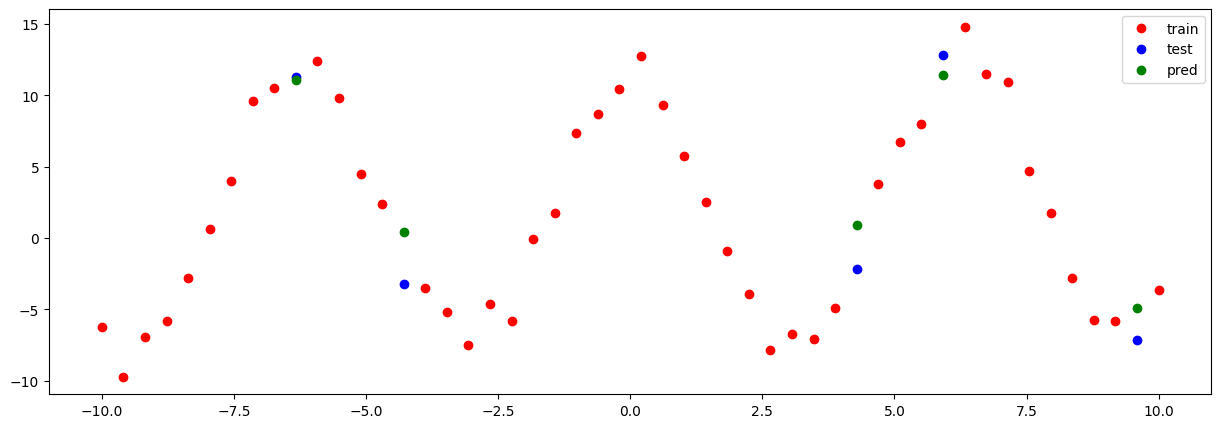

In [25]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(x_train, y_train, linestyle="none", marker='o', c="red")
ax.plot(x_test, y_test, linestyle="none", marker='o', c="blue")
ax.plot(x_test, results["y_pred"], linestyle="none", marker='o', c="green")
ax.legend(["train", "test", "pred"])
plt.show()

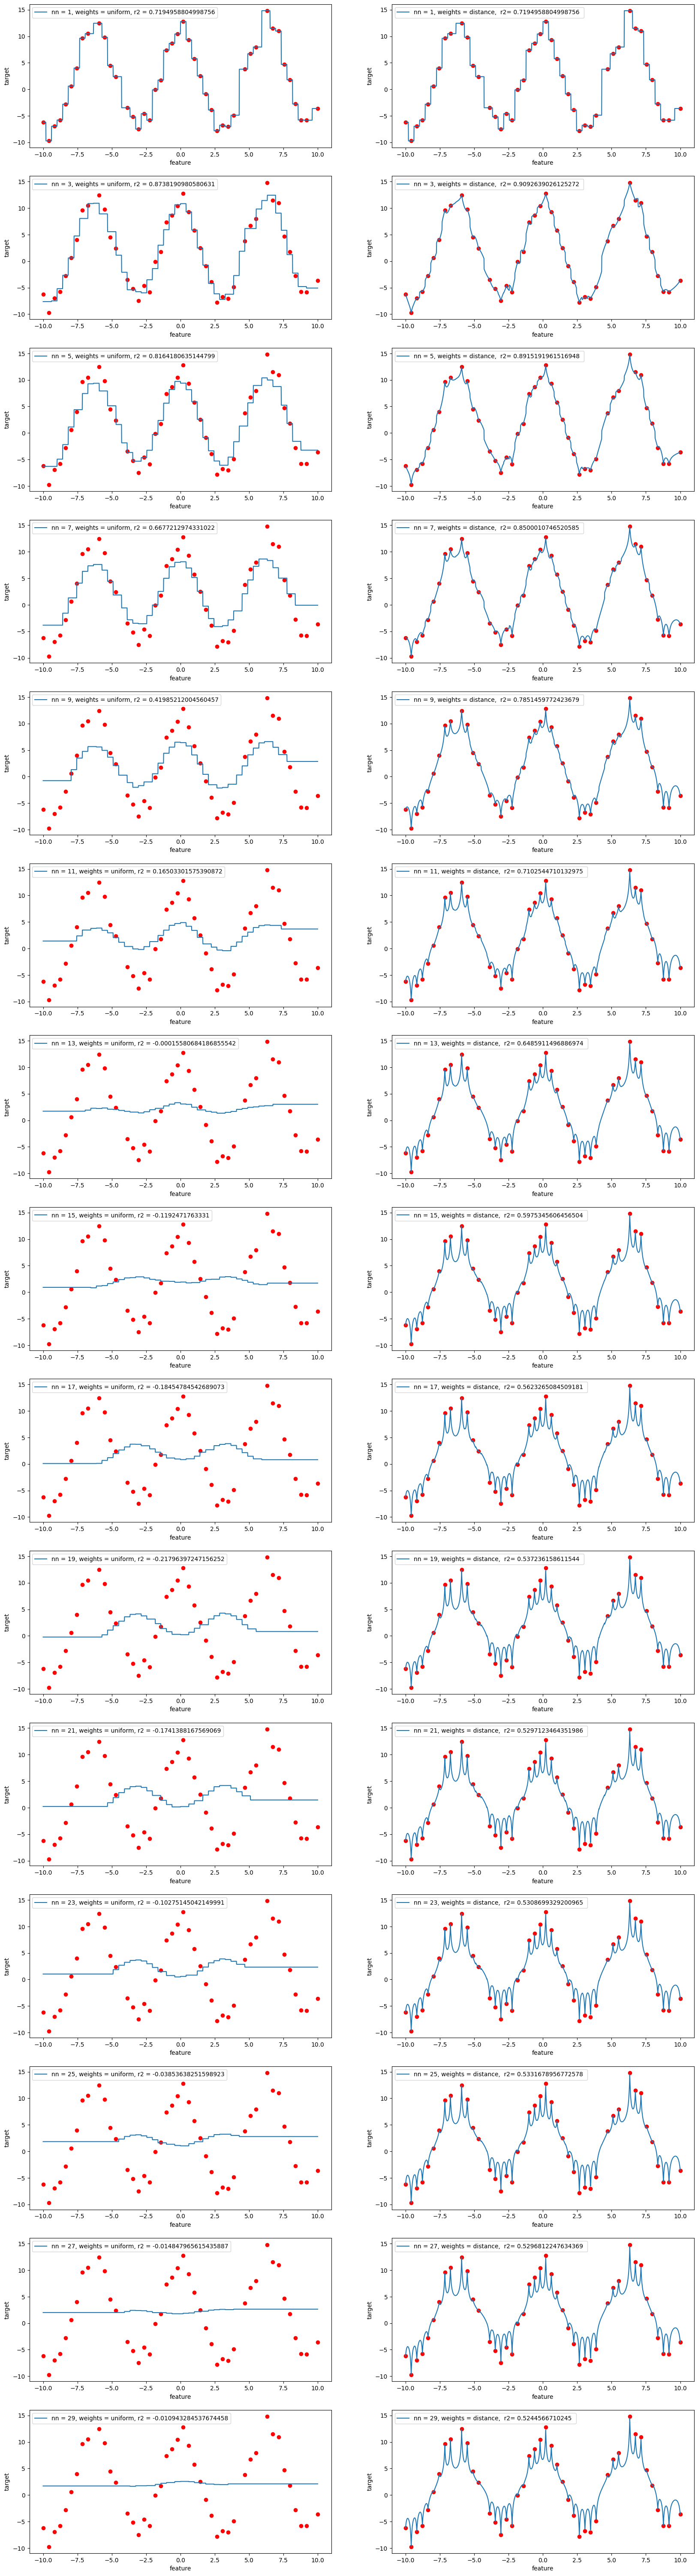

In [26]:
X = np.arange(a, b, .011).reshape(-1, 1)

K = 30
fig = plt.figure(figsize=(10 * 2, 5 * K))

im_idx = 0

for nn in range(1, K, 2):
    #  weights='uniform'
    # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
    knr = KNeighborsRegressor(n_neighbors=nn, weights='uniform').fit(x_train.reshape(-1, 1), y_train)
    y = knr.predict(X)

    im_idx += 1
    ax = fig.add_subplot(K - 1, 2, im_idx)
    #ax.plot(timeline, wave, marker='o', alpha=0.5, label='original')
    ax.plot(x_train, y_train, linestyle="none", marker='o', c="red")
    ax.plot(X, y, label=f'nn = {nn}, weights = uniform, r2 = {knr.score(x_test.reshape(-1, 1), y_test)}')
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    ax.legend()

    # weights='distance'
    # ‘distance’ : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    knr = KNeighborsRegressor(n_neighbors=nn, weights='distance').fit(x_train.reshape(-1, 1), y_train)
    y = knr.predict(X)
    
    im_idx += 1
    ax = fig.add_subplot(K - 1, 2, im_idx)
    #ax.plot(timeline, wave, label='original')
    ax.plot(x_train, y_train, linestyle="none", marker='o', c="red")
    ax.plot(X, y, label=f'nn = {nn}, weights = distance,  r2= {knr.score(x_test.reshape(-1, 1), y_test)} ')
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    ax.legend()
    
plt.show()

Let us see how it behaves outside the samples

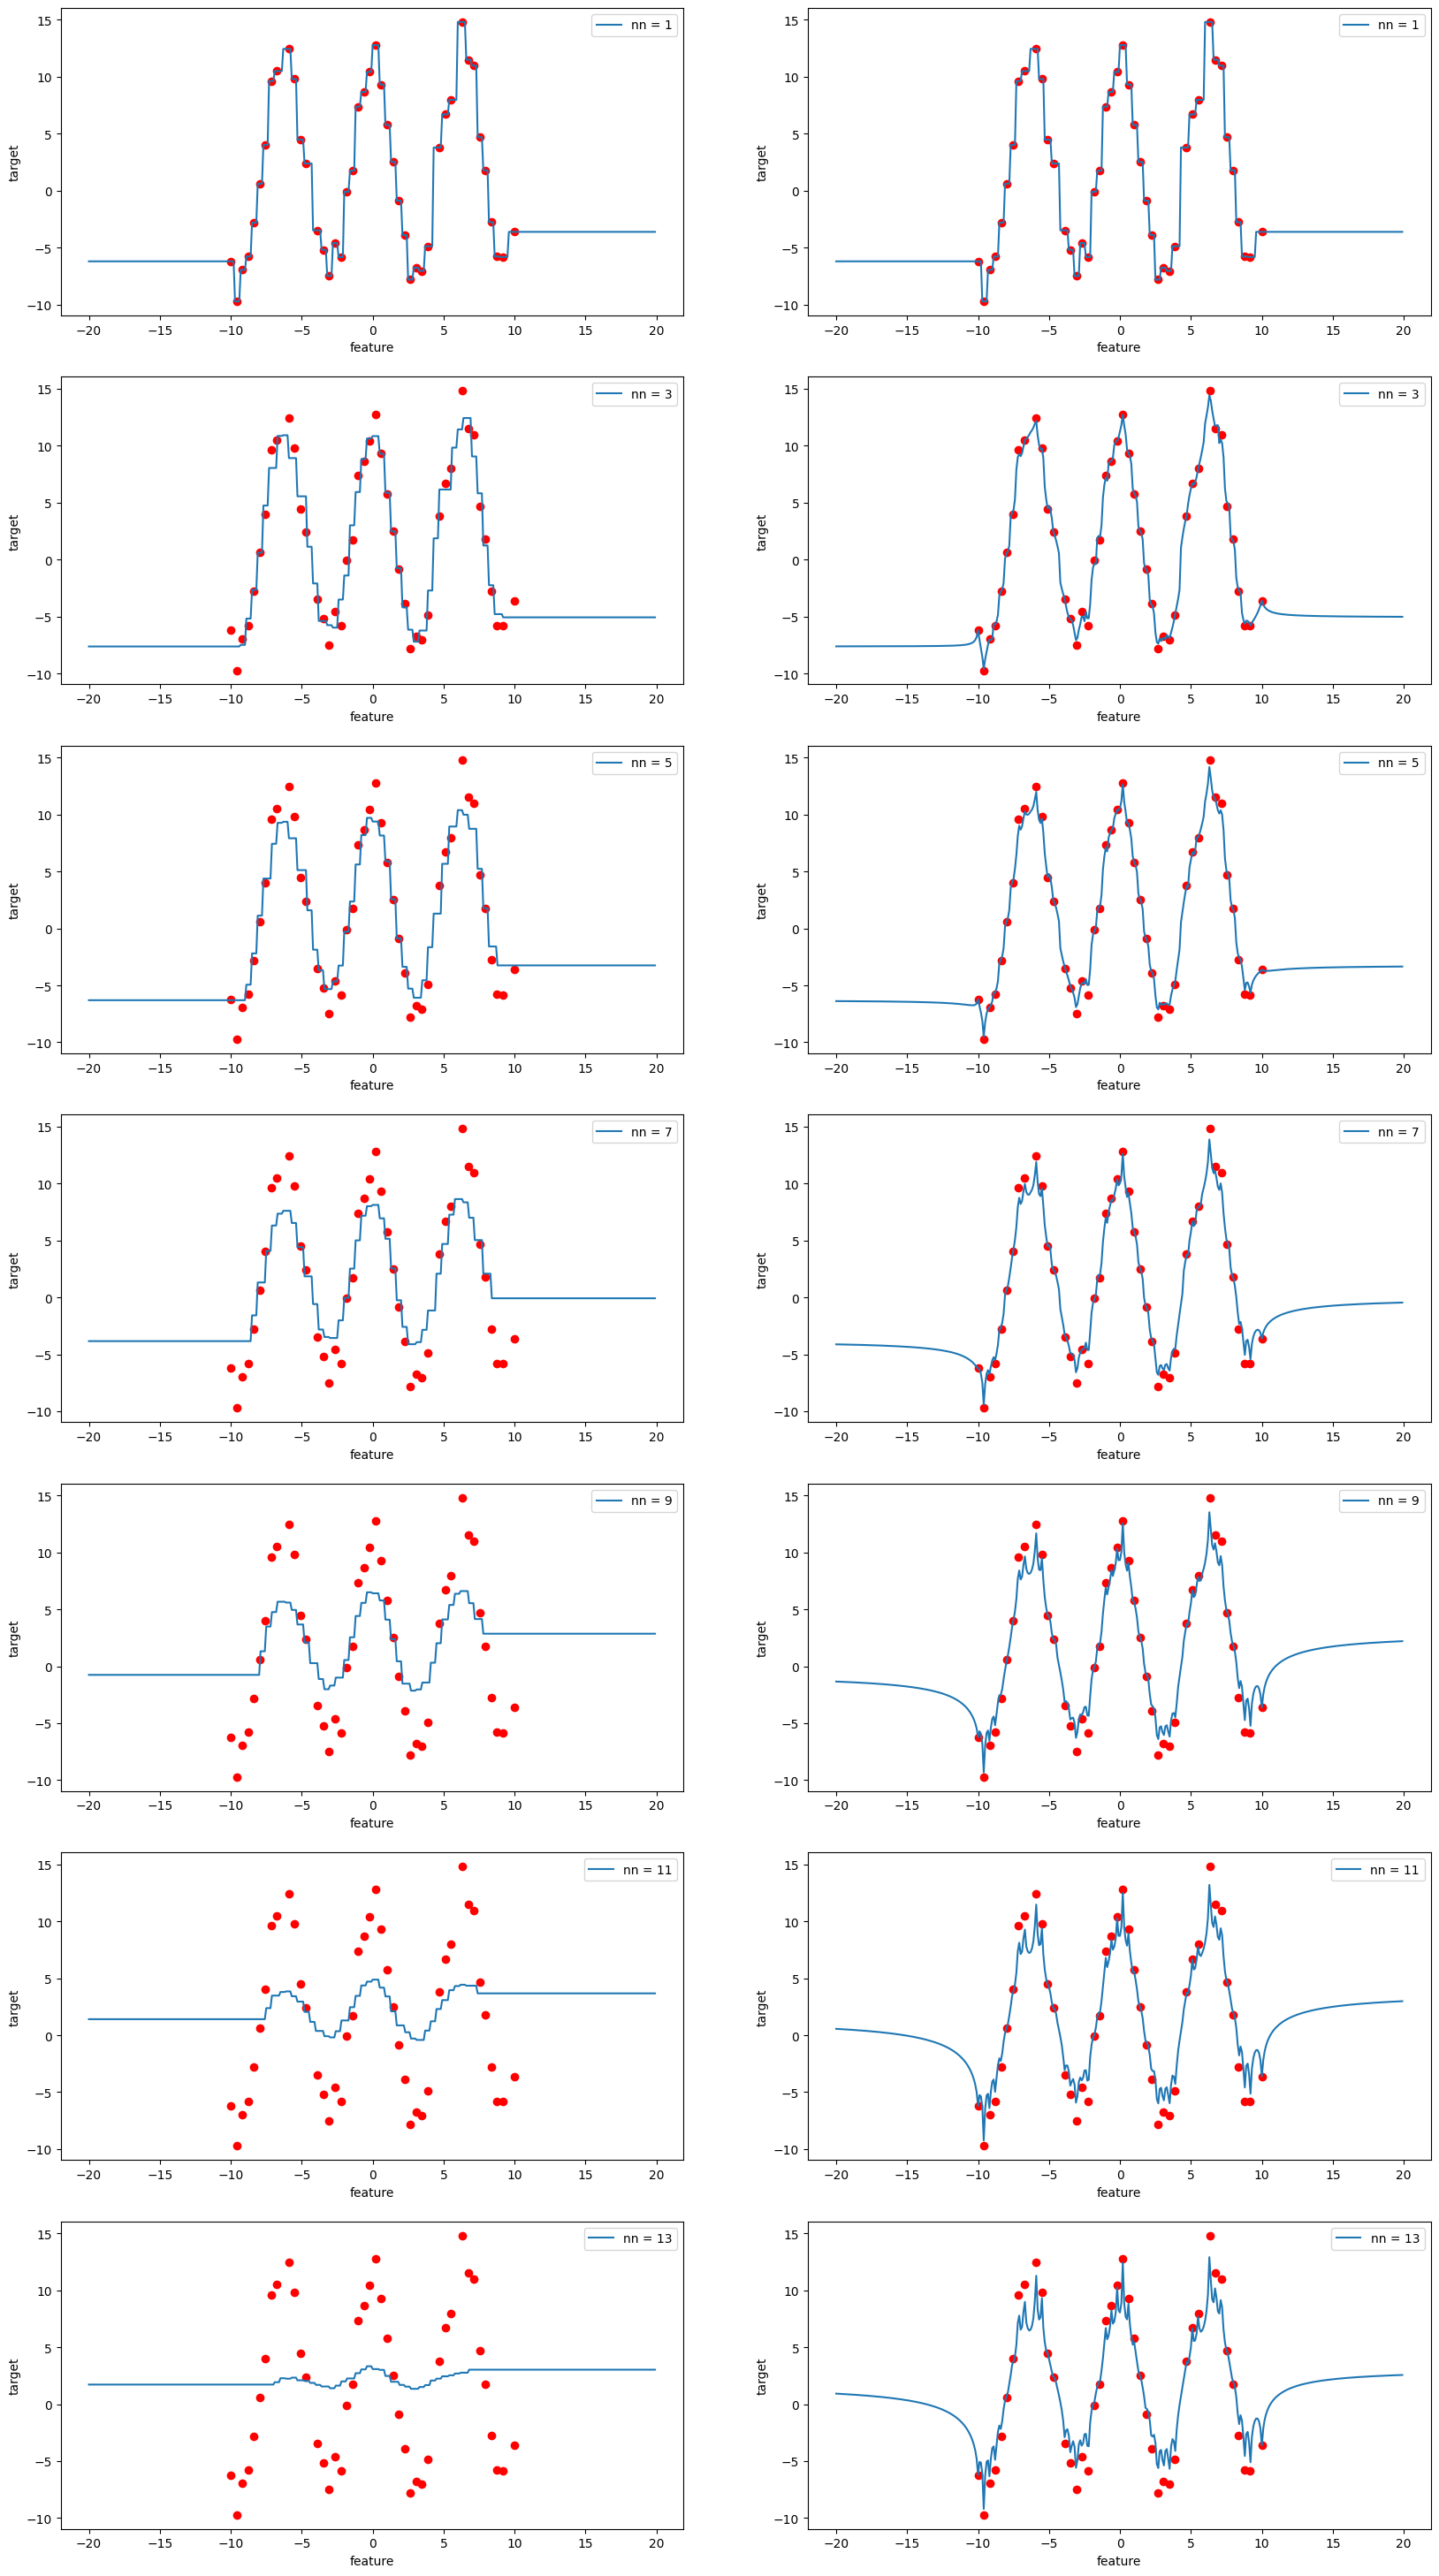

In [27]:
# supposing a<0
X = np.arange(2 * a, 2 * b, .1).reshape(-1, 1)

K = 15
fig = plt.figure(figsize=(10 * 2, 5 * K))

im_idx = 0

for nn in range(1, K, 2):
    #  weights='uniform'
    # ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
    knr = KNeighborsRegressor(n_neighbors=nn, weights='uniform').fit(x_train.reshape(-1, 1), y_train)
    y = knr.predict(X)

    im_idx += 1
    ax = fig.add_subplot(K - 1, 2, im_idx)
    ax.plot(x_train, y_train, linestyle="none", marker='o', c="red")
    ax.plot(X, y, label='nn = {}'.format(nn))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    ax.legend()

    # weights='distance'
    # ‘distance’ : weight points by the inverse of their distance. In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
    knr = KNeighborsRegressor(n_neighbors=nn, weights='distance').fit(x_train.reshape(-1, 1), y_train)
    y = knr.predict(X)
    
    im_idx += 1
    ax = fig.add_subplot(K - 1, 2, im_idx)
    ax.plot(x_train, y_train, linestyle="none", marker='o', c="red")
    ax.plot(X, y, label='nn = {}'.format(nn))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    ax.legend()
    
plt.show()

# Exercise

Go to notebook in [./Exercises/10-kNN-diabetes_dataset.ipynb](./Exercises/10-kNN-diabetes_dataset.ipynb)